## ランダムフォレストによる回帰の実装及び可視化

In [ ]:
!pip install -q optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 4.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
import graphviz
from sklearn.tree import export_graphviz

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from scipy import stats
import optuna

In [ ]:
# データの読み込み
df = pd.read_csv("learning_Li_battery_data.csv")
df.head()

,num_steps,nelements,max_delta_volume,average_voltage,capacity_grav,fracA_discharge,stability_charge,minimum CN_VoronoiNN,maximum CN_VoronoiNN,range CN_VoronoiNN,...,minimum local difference in GSvolume_pa,maximum local difference in GSvolume_pa,mean local difference in GSvolume_pa,minimum local difference in SpaceGroupNumber,maximum local difference in SpaceGroupNumber,avg_dev local difference in SpaceGroupNumber,0-norm,2-norm,frac s valence electrons,frac p valence electrons
0,2,3,0.008674,3.645088,137.171754,0.250000,0.037008,5.999755,10.195544,4.195789,...,1.140000,7.084399,2.644168,113.035858,212.940334,33.974522,4,0.630840,0.292135,0.359551
1,1,3,0.003674,3.555958,69.825436,0.250000,0.089504,5.999351,8.565770,2.566419,...,1.215000,6.936504,3.498748,156.870787,216.998680,22.156506,4,0.607362,0.298851,0.367816
2,1,4,0.078912,3.637514,148.887306,0.142857,0.067563,4.363747,11.904116,7.540370,...,1.966086,22.455000,6.001459,10.000000,213.100189,44.926378,4,0.699702,0.274390,0.481707
3,1,3,0.024693,2.901634,184.256618,0.181818,0.078001,5.979264,9.364866,3.385601,...,1.208721,7.730853,3.161494,77.542331,188.099741,37.717392,4,0.583095,0.350000,0.400000
4,1,5,0.071289,3.757691,113.645161,0.100000,0.045275,4.070083,10.731594,6.661512,...,1.214808,13.465238,4.284699,10.000000,212.979362,48.159064,5,0.695000,0.314159,0.504425


In [ ]:
# 目的変数
target = "capacity_grav"

In [ ]:
df.shape

(2391, 73)

In [ ]:
# 目的変数と説明変数に分割
y = df[target].values
x = df.drop(target, axis=1)

In [ ]:
# 学習用とテスト用に分割
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
#モデルの定義
rf = RandomForestRegressor(n_estimators=3, max_depth=5, random_state=0)

In [ ]:
# モデルの学習
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=3, random_state=0)

In [ ]:
# モデルの検証
print('train score : ', rf.score(x_train, y_train))
print('test score : ', rf.score(x_test, y_test))

train score :  0.8446828095459216
test score :  0.8017619858791621


In [ ]:
# 推論
y_pred =rf.predict(x_test)

In [ ]:
# RMSE
np.sqrt(mean_squared_error(y_test, y_pred))

33.875993637820045

In [ ]:
# 決定係数
r2_score(y_test, y_pred)

0.8017619858791621

In [ ]:
dict = {"RMSE":np.sqrt(mean_squared_error(y_test, y_pred)), "決定係数":r2_score(y_test, y_pred)}
pd.DataFrame(dict, index=["RandomForestRegressor"])

,RMSE,決定係数
RandomForestRegressor,33.875994,0.801762


## 決定木の可視化

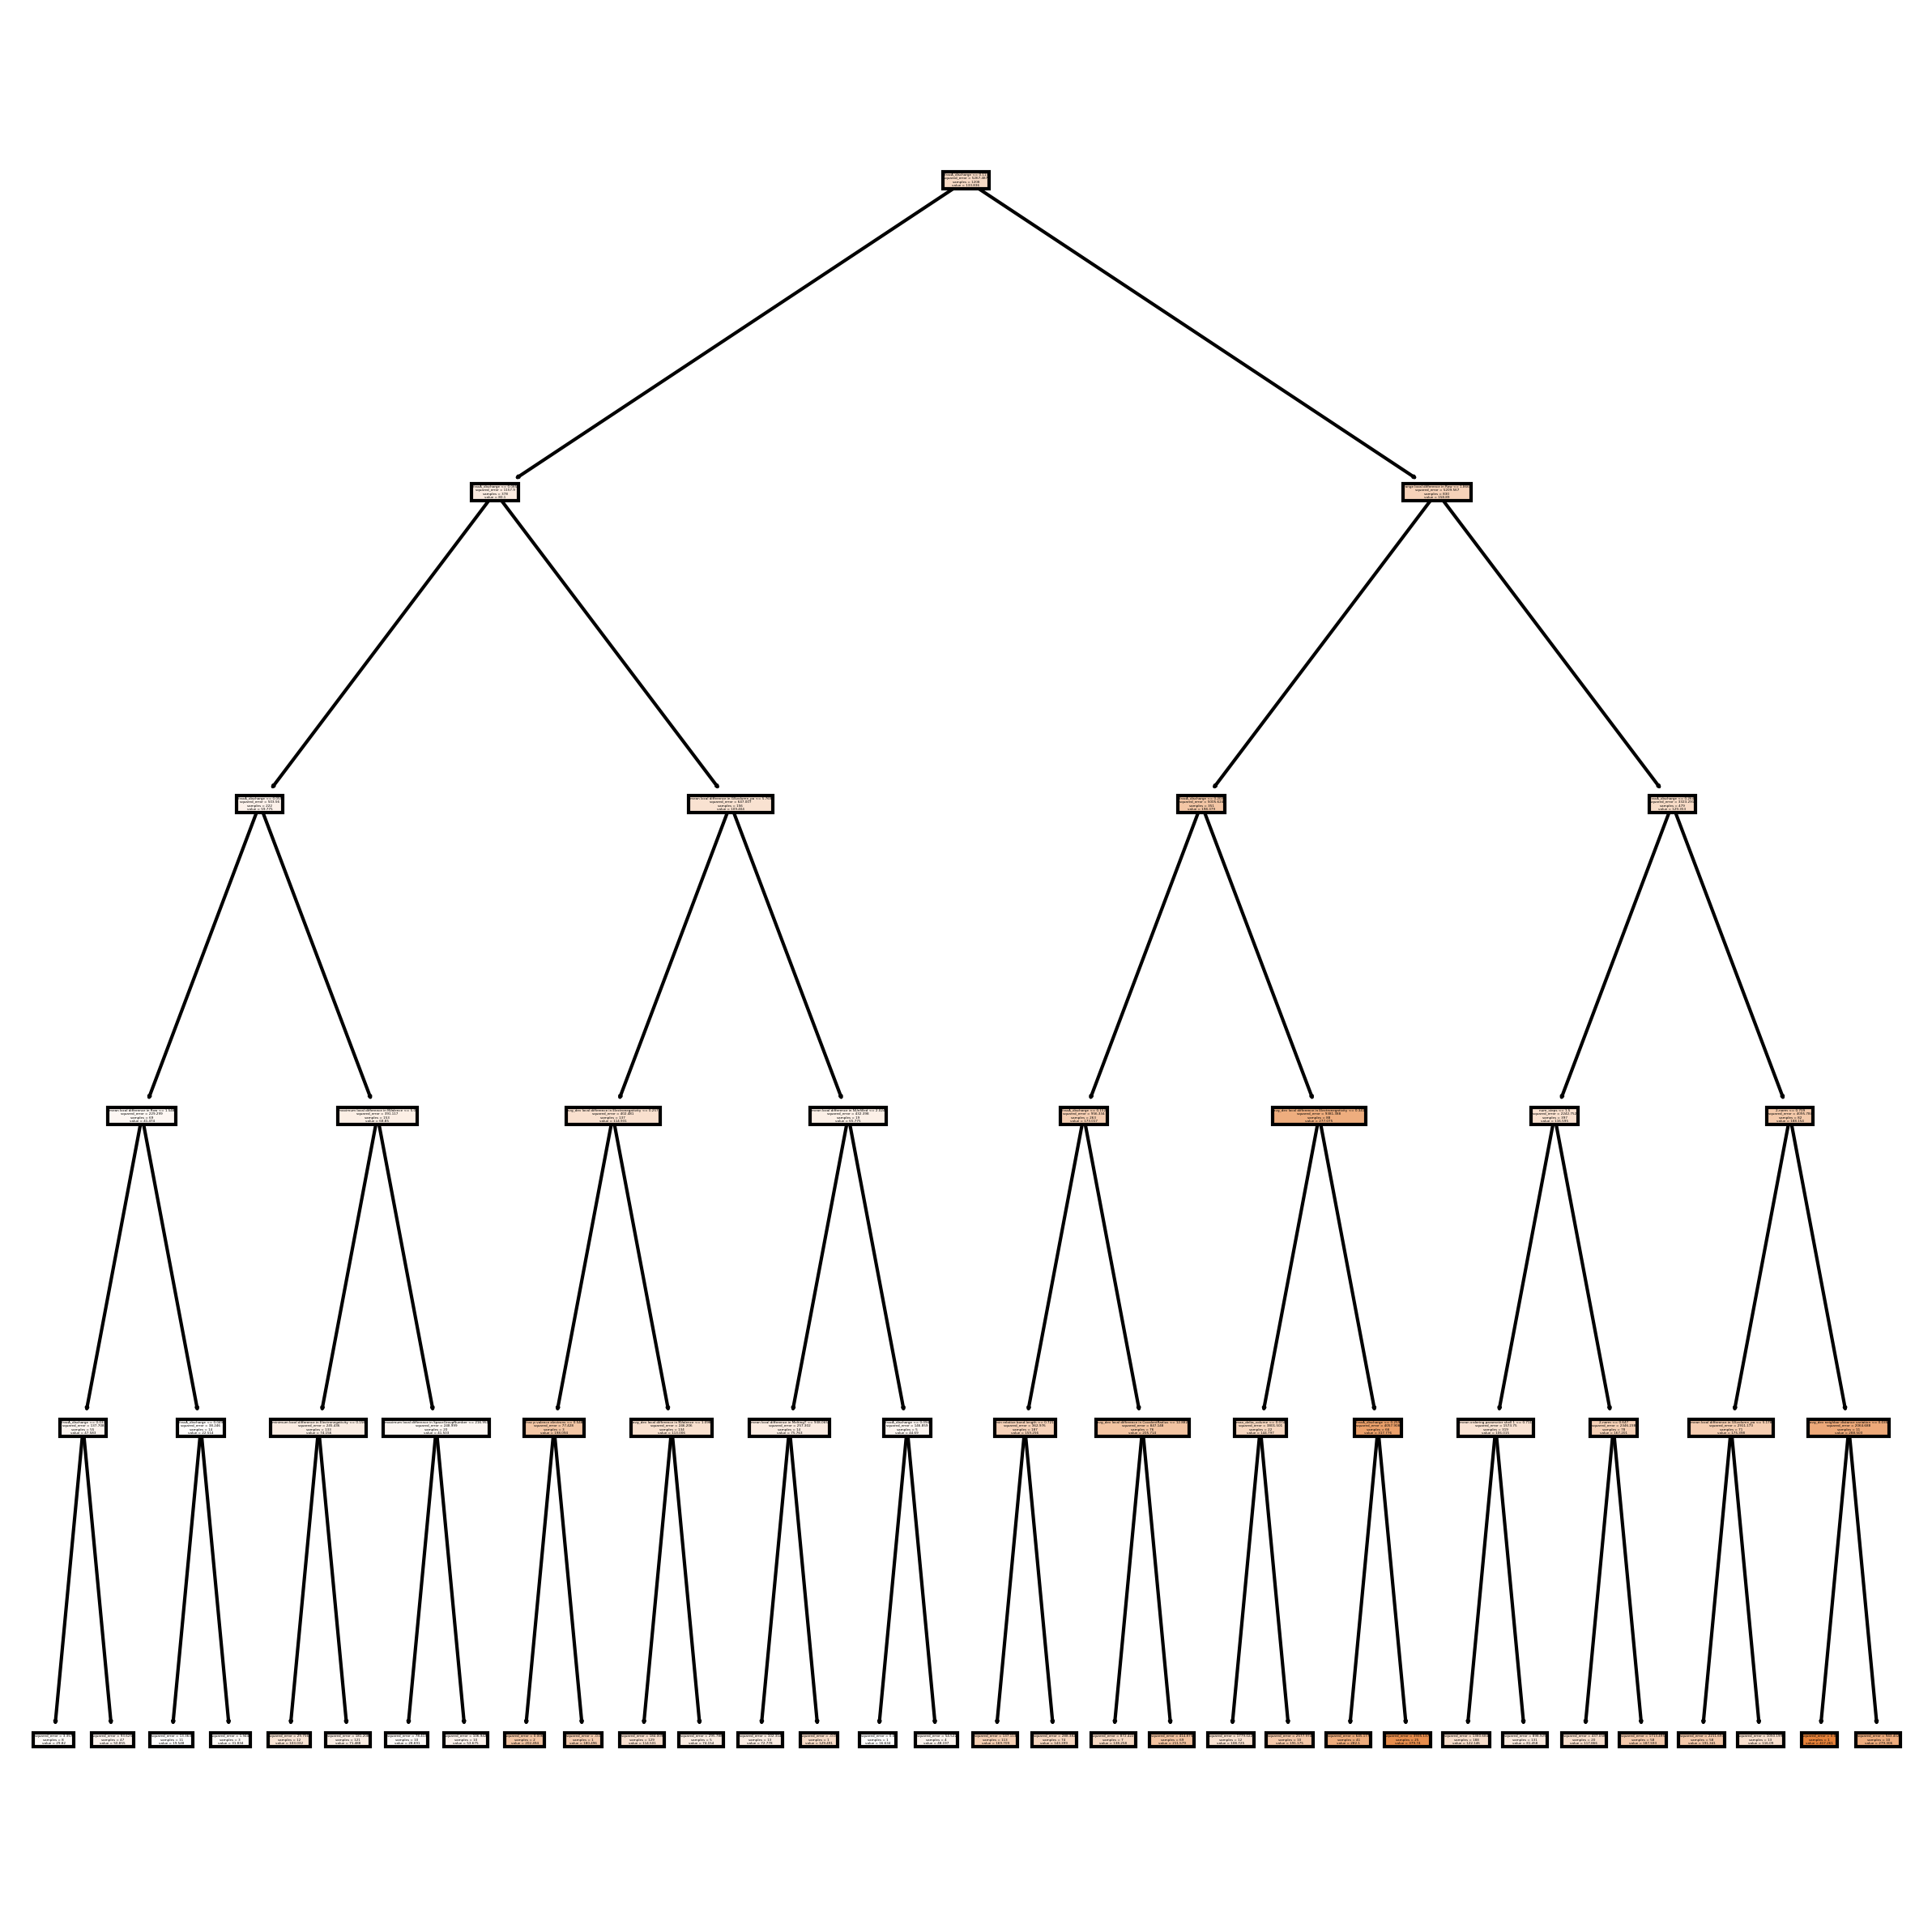

In [ ]:
# 各決定木の可視化
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)
tree = plot_tree(rf.estimators_[0],
                 feature_names = x.columns,
                 filled = True)
plt.show()

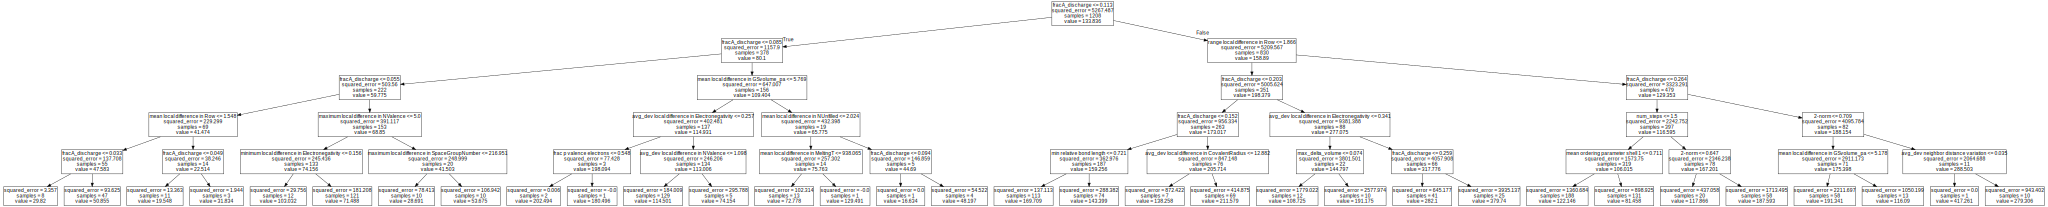

In [ ]:
# 決定木の一つを取り出し可視化
estimators = rf.estimators_
dot_data = export_graphviz(estimators[0], feature_names=x.columns)

graph_tree = graphviz.Source(dot_data)
graph_tree

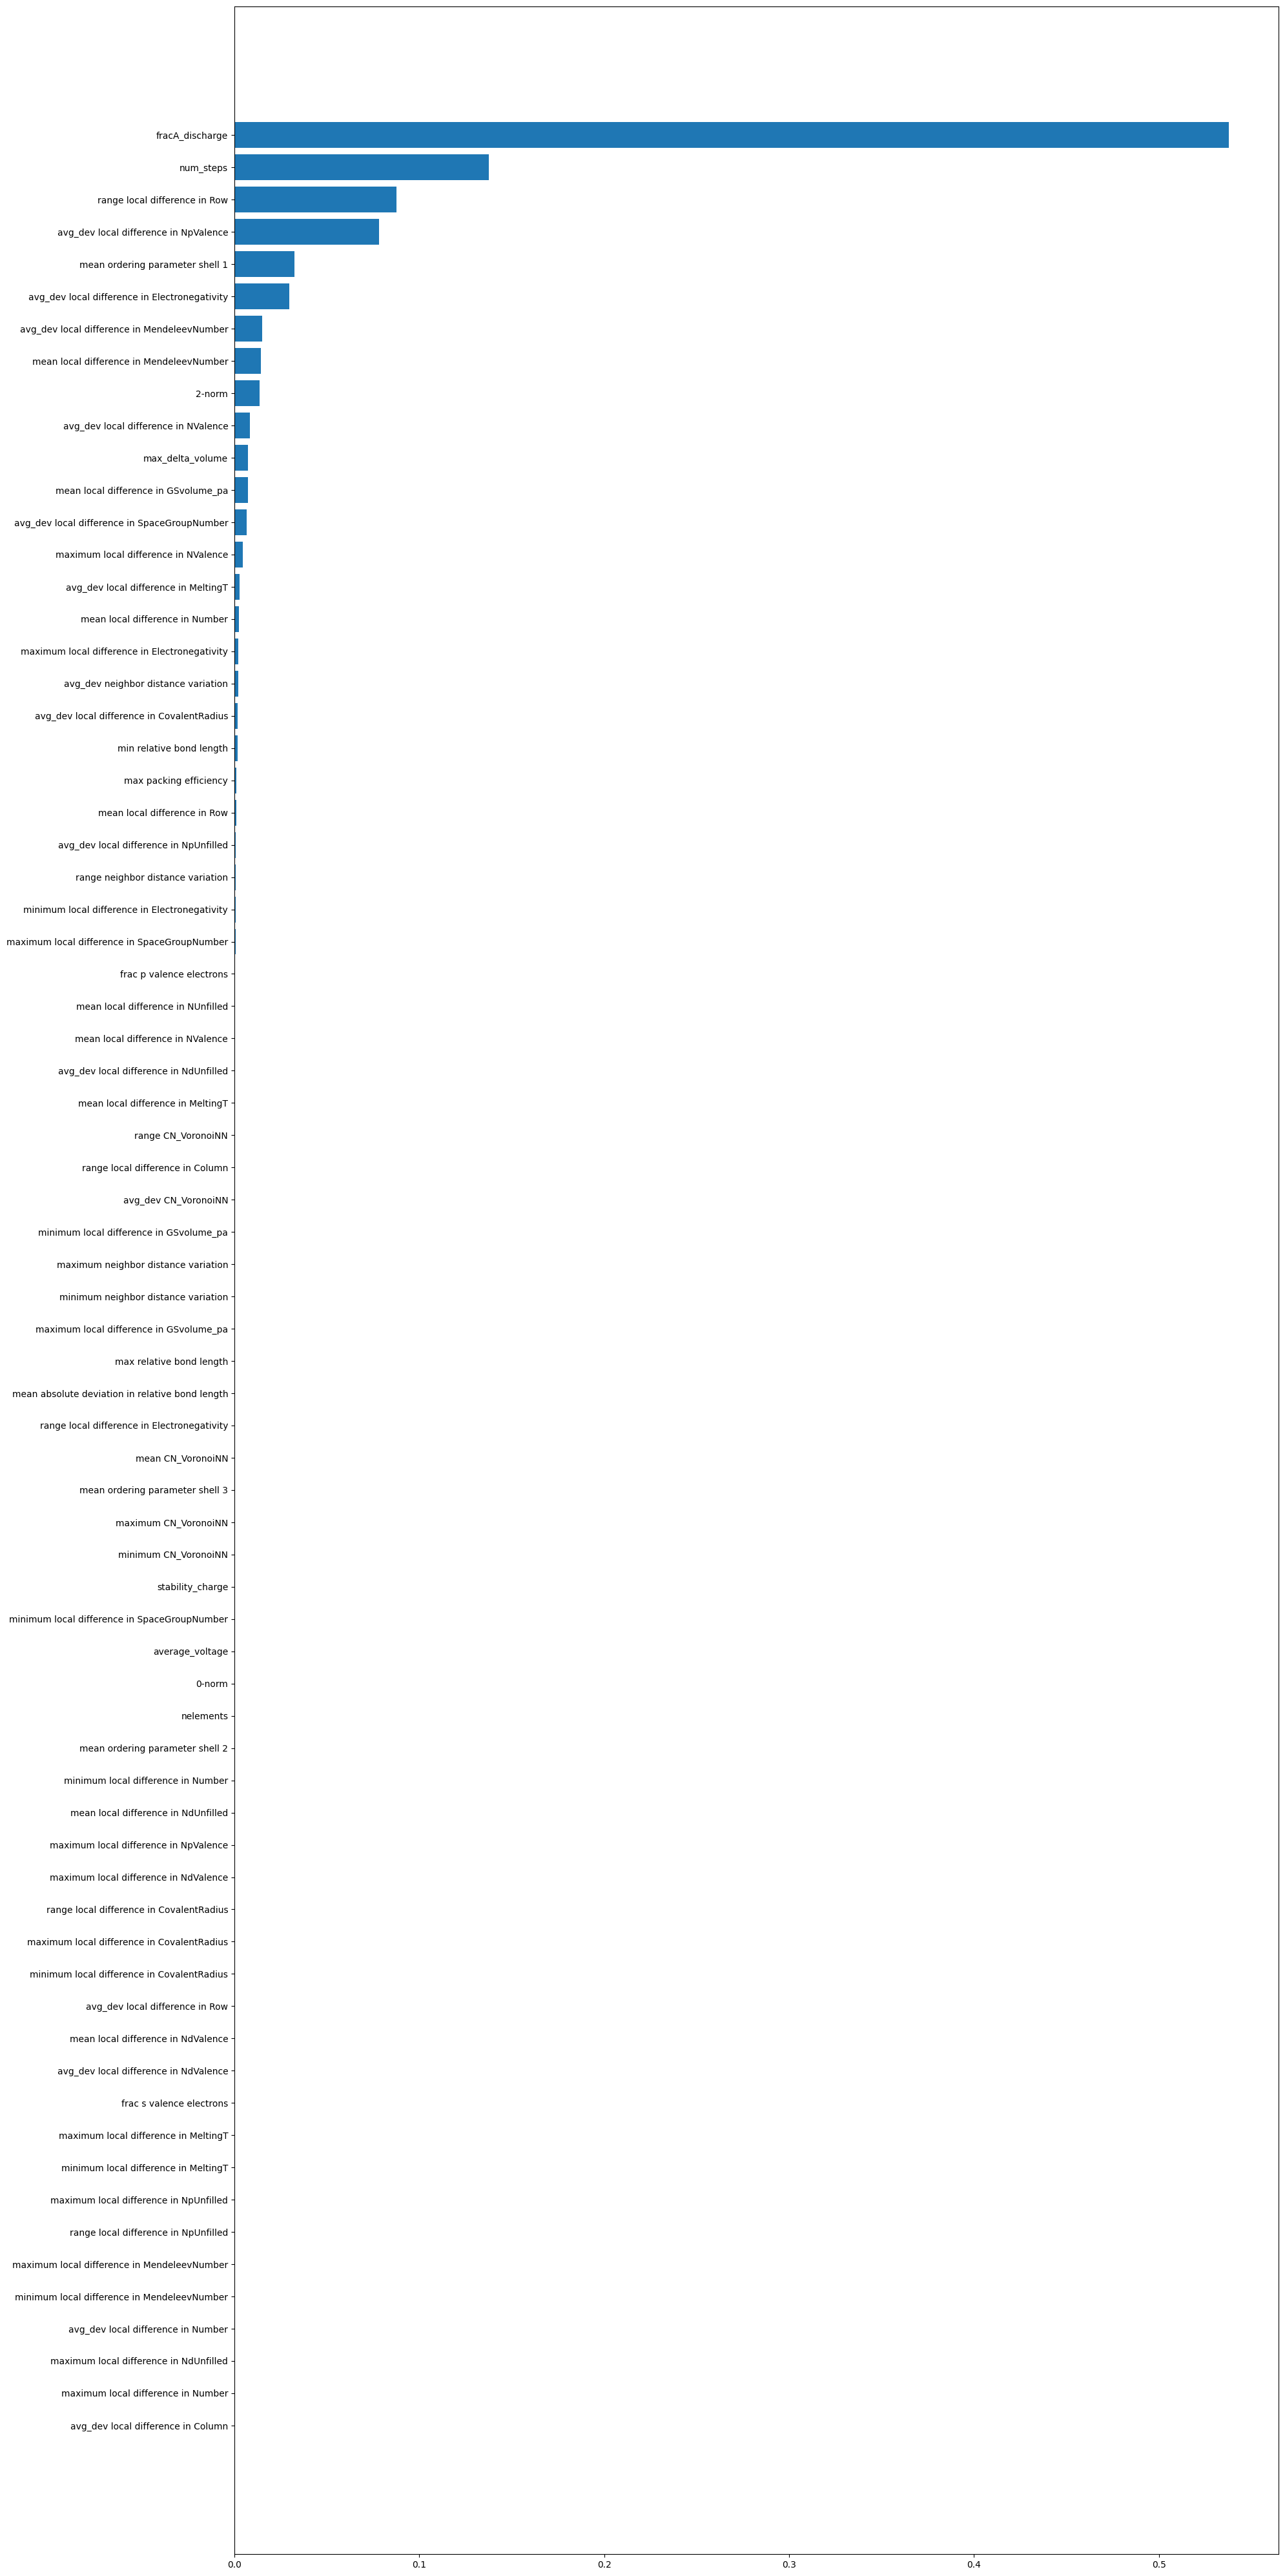

In [ ]:
# 変数重要度の可視化
feature_importance = rf.feature_importances_

# 変数重要度を降順にソート
sorted_idx = np.argsort(feature_importance)

# ソートされた変数名と変数重要度
sorted_y = x.columns[sorted_idx]
sorted_width = feature_importance[sorted_idx]

plt.figure(figsize=(20, 40))

plt.barh(y=sorted_y, width=sorted_width);
plt.tight_layout()
plt.show()

## optunaによるチューニング

In [ ]:
# 目的関数の定義
def objective(trial):
    # ハイパーパラメータの探索範囲を定義
    max_depth = trial.suggest_int('max_depth', 2, 32)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)

    # モデルの構築
    model = RandomForestRegressor(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf
    )

    # モデルの訓練
    model.fit(x_train, y_train)

    # 予測値の計算
    y_pred = model.predict(x_test)

    # RMSEの計算
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # 決定係数の計算
    r2 = r2_score(y_test, y_pred)

    return rmse, r2

# Optunaで最適化
study = optuna.create_study(directions=['minimize', 'maximize'])
study.optimize(objective, n_trials=100)

# 結果の表示
print('Best trials:')
for i, trial in enumerate(study.best_trials):
    print(f'Trial {i+1}:')
    print('  RMSE: {:.3f}'.format(trial.values[0]))
    print('  R2 Score: {:.3f}'.format(trial.values[1]))
    print('  Params: ')
    for key, value in trial.params.items():
        print('    {}: {}'.format(key, value))

[I 2024-05-05 02:00:51,672] A new study created in memory with name: no-name-8def4c82-f177-4813-be8c-51732f3fa017
[I 2024-05-05 02:00:56,575] Trial 0 finished with values: [29.394634859920345, 0.8507415275276687] and parameters: {'max_depth': 11, 'min_samples_split': 18, 'min_samples_leaf': 17}. 
[I 2024-05-05 02:00:59,860] Trial 1 finished with values: [37.62419313137992, 0.7554671309970673] and parameters: {'max_depth': 4, 'min_samples_split': 10, 'min_samples_leaf': 17}. 
[I 2024-05-05 02:01:08,125] Trial 2 finished with values: [26.553546391950732, 0.8781998236082957] and parameters: {'max_depth': 16, 'min_samples_split': 18, 'min_samples_leaf': 9}. 
[I 2024-05-05 02:01:16,328] Trial 3 finished with values: [25.526737067632084, 0.8874375691727966] and parameters: {'max_depth': 11, 'min_samples_split': 5, 'min_samples_leaf': 7}. 
[I 2024-05-05 02:01:23,422] Trial 4 finished with values: [28.40922438779183, 0.8605811143302668] and parameters: {'max_depth': 27, 'min_samples_split': 16

Best trials:
Trial 1:
  RMSE: 23.705
  R2 Score: 0.903
  Params: 
    max_depth: 12
    min_samples_split: 2
    min_samples_leaf: 2


In [ ]:
trial.params

{'max_depth': 12, 'min_samples_split': 2, 'min_samples_leaf': 2}

In [ ]:
# 最適なハイパーパラメータを設定したモデルの定義
best_model = RandomForestRegressor(**trial.params)

# モデルの学習
best_model.fit(x_train, y_train)

# モデルの検証
print(best_model.score(x_train, y_train))
print(best_model.score(x_test, y_test))

0.9817058234428214
0.9016014535622626


In [ ]:
y_pred = best_model.predict(x_test)

In [ ]:
# RMSE
np.sqrt(mean_squared_error(y_test, y_pred))

23.866729717714733

In [ ]:
# 決定係数
r2_score(y_test, y_pred)

0.9016014535622626

In [ ]:
dict = {"RMSE":np.sqrt(mean_squared_error(y_test, y_pred)), "決定係数":r2_score(y_test, y_pred)}
pd.DataFrame(dict, index=["RandomForestRegressor"])

,RMSE,決定係数
RandomForestRegressor,23.86673,0.901601


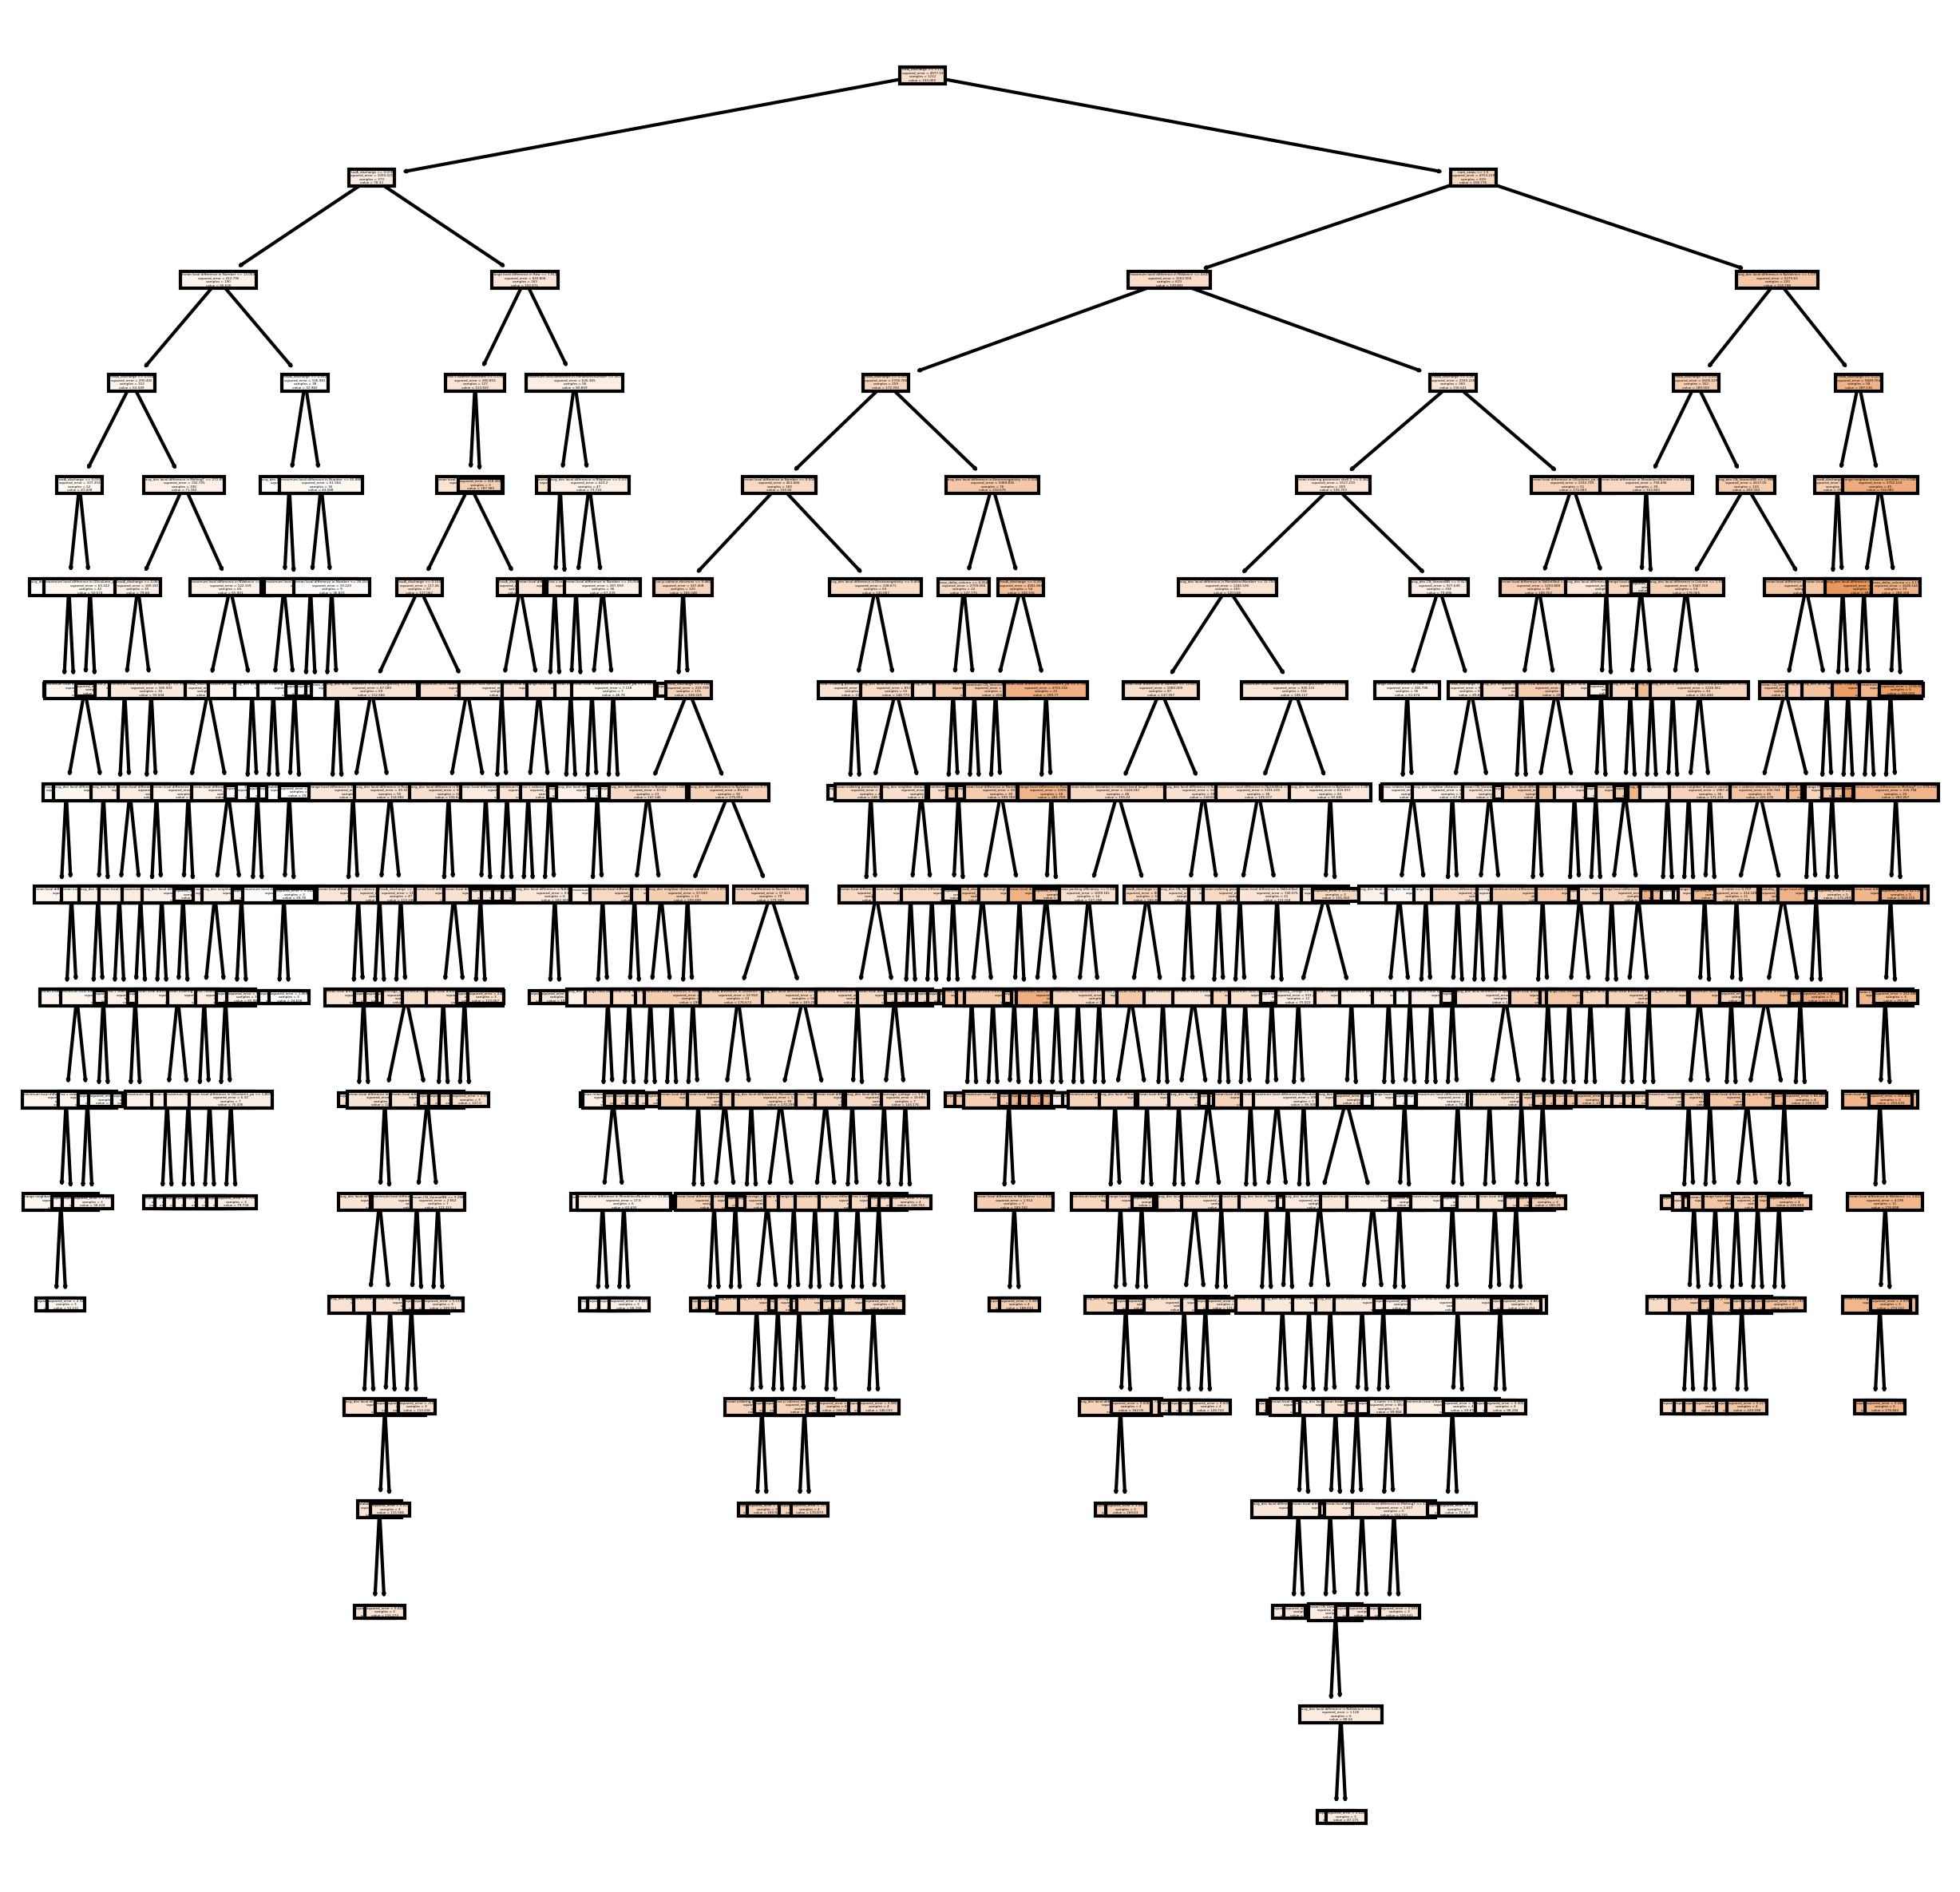

In [ ]:
# 決定木の一つを可視化
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)
tree = plot_tree(best_model.estimators_[0],
                 feature_names = x.columns,
                 filled = True)
plt.show()

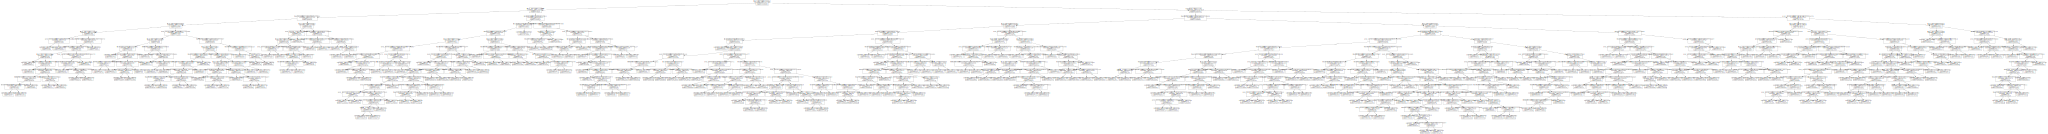

In [ ]:
# 決定木の一つを取り出し可視化
estimators = best_model.estimators_
dot_data = export_graphviz(estimators[0], feature_names=x.columns)

graph_tree = graphviz.Source(dot_data)
graph_tree

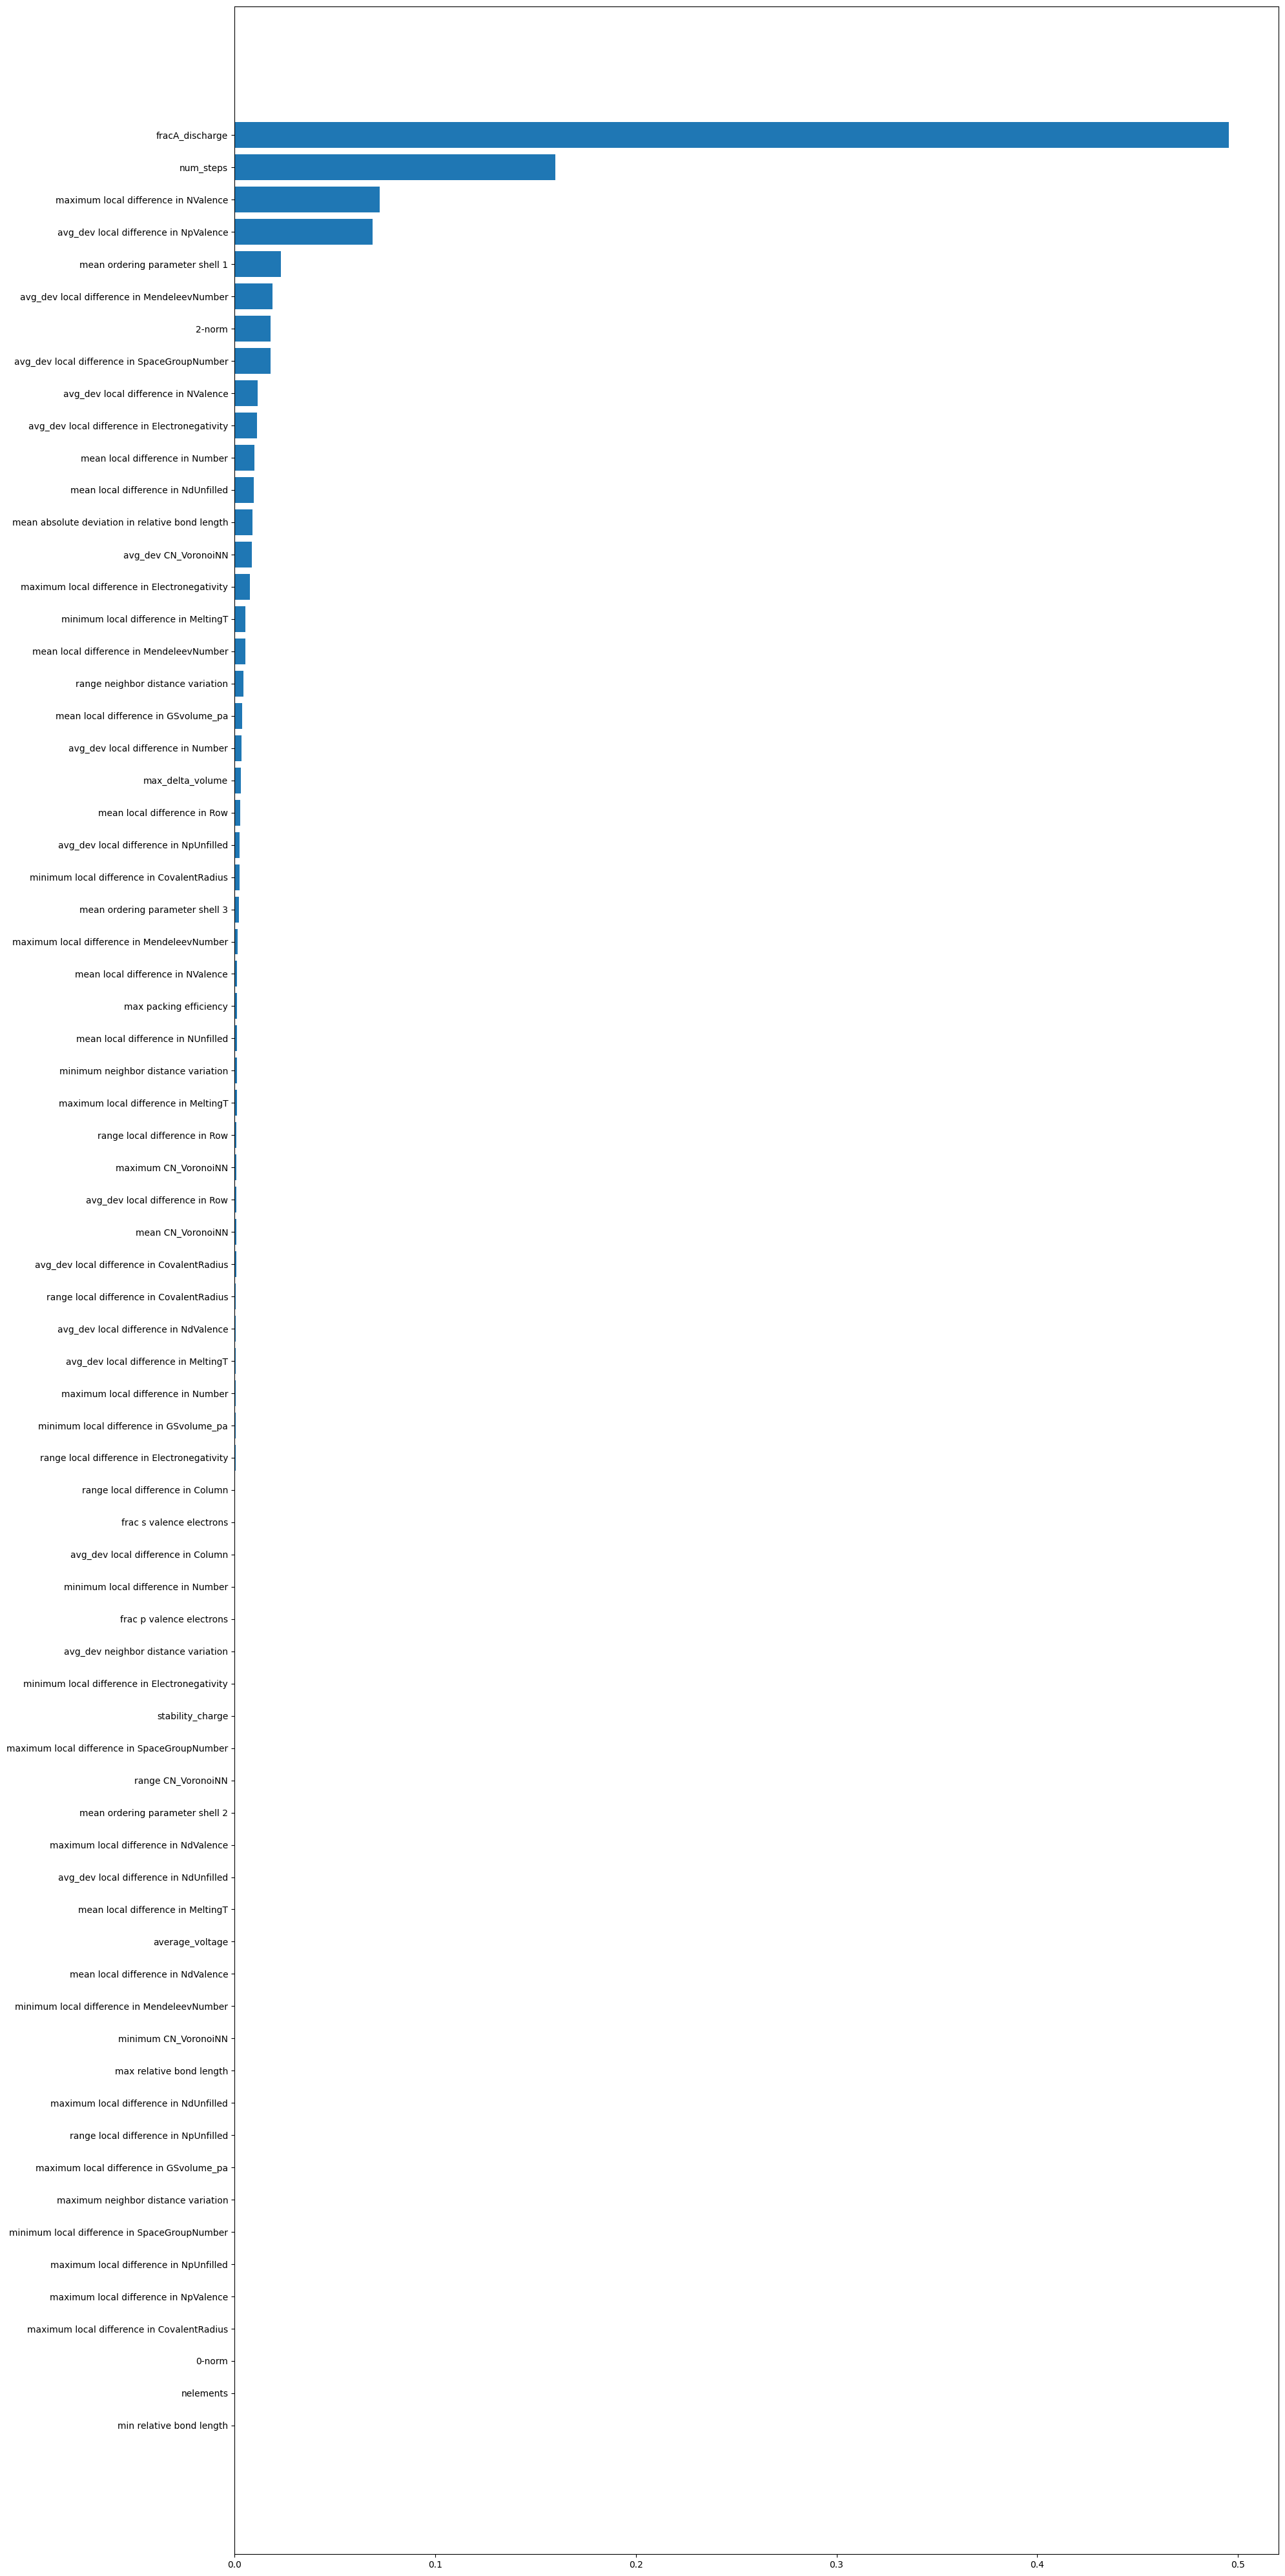

In [ ]:
# 変数重要度の可視化
feature_importance = best_model.feature_importances_

# 変数重要度を降順にソート
sorted_idx = np.argsort(feature_importance)

# ソートされた変数名と変数重要度
sorted_y = x.columns[sorted_idx]
sorted_width = feature_importance[sorted_idx]

plt.figure(figsize=(20, 40))

plt.barh(y=sorted_y, width=sorted_width);
plt.tight_layout()
plt.show()

## 重要度の高い変数
- fracA_discharge
- num_steps
- maximum local difference in NValence
- avg_dev local difference in NpValence
- mean ordering parameter shell 1
- avg_dev local difference in MendeleevNumber
- 2-norm
- avg_dev local difference in SpaceGroupNumber
- avg_dev local difference in NValence
- avg_dev local difference in Electronegativity

In [ ]:
# 電荷量の重量比の散布図と相関係数を算出する関数
def corr_plot(column_name, target):
    r, pvalue = stats.pearsonr(df[column_name], df[target])
    print(f'相関係数：{r}')
    print(f'p値{pvalue:.3f}')

    if pvalue > 0.05:
        print("母相関係数は0であるため、相関があるとは言えない")
    else:
        print("母相関係数は0ではないため、相関がある")

    plt.scatter(x=df[column_name], y=df[target])
    plt.xlabel(column_name)
    plt.ylabel(target)
    plt.title("Scatter Plot of {} vs {}".format(column_name, target))
    plt.show()

相関係数：0.5422359457877547
p値0.000
母相関係数は0ではないため、相関がある


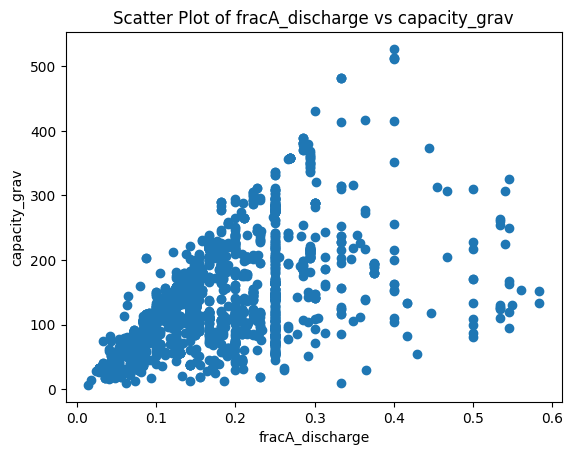

In [ ]:
# 放電時のLiイオンの割合と電荷量の重量比の散布図
corr_plot("fracA_discharge", target)

相関係数：0.5030467482712309
p値0.000
母相関係数は0ではないため、相関がある


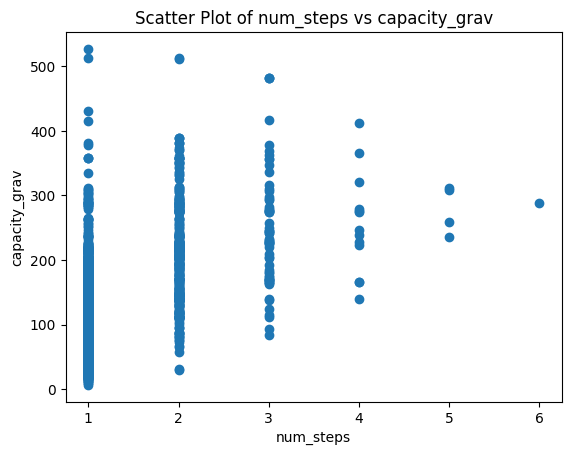

In [ ]:
# ステップ数と電荷量の重量比の散布図
corr_plot("num_steps", target)

相関係数：-0.20454261758284353
p値0.000
母相関係数は0ではないため、相関がある


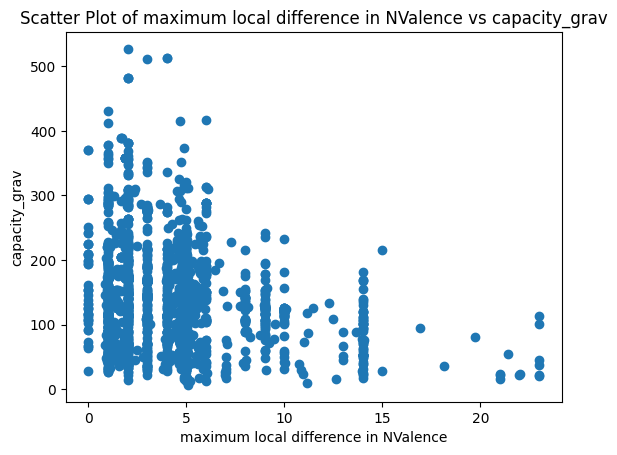

In [ ]:
# 原子またはイオンの価電子数の最大値と電荷量の重量比の散布図
corr_plot("maximum local difference in NValence", target)

相関係数：0.2959979911011969
p値0.000
母相関係数は0ではないため、相関がある


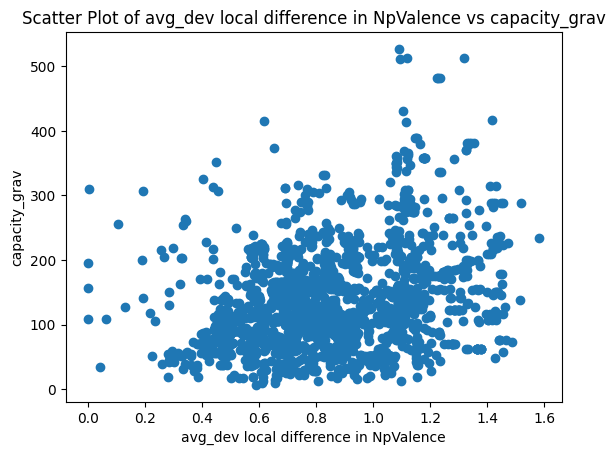

In [ ]:
# p軌道に存在する価電子と電荷量の重量比の散布図
corr_plot("avg_dev local difference in NpValence", target)

相関係数：-0.25891159928253277
p値0.000
母相関係数は0ではないため、相関がある


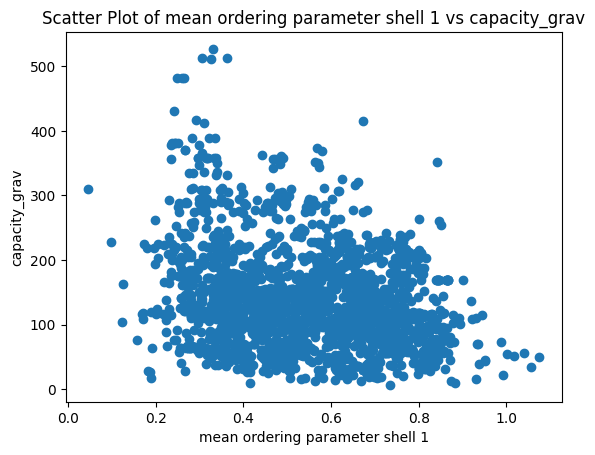

In [ ]:
# 結晶構造の各原子の最も近い原子を基準とした平均秩序パラメータと電荷量の重量比の散布図
corr_plot("mean ordering parameter shell 1", target)

相関係数：-0.014470827821462823
p値0.479
母相関係数は0であるため、相関があるとは言えない


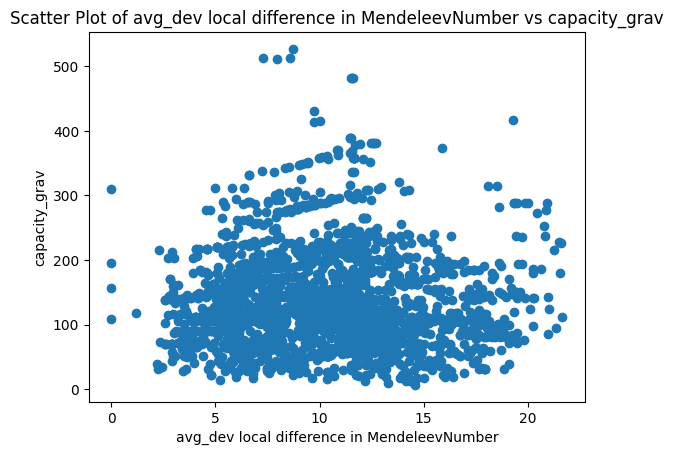

In [ ]:
# 近傍原子とそのMendeleev番号との差の平均と電荷量の重量比の散布図
corr_plot("avg_dev local difference in MendeleevNumber", target)

相関係数：0.2080687474816845
p値0.000
母相関係数は0ではないため、相関がある


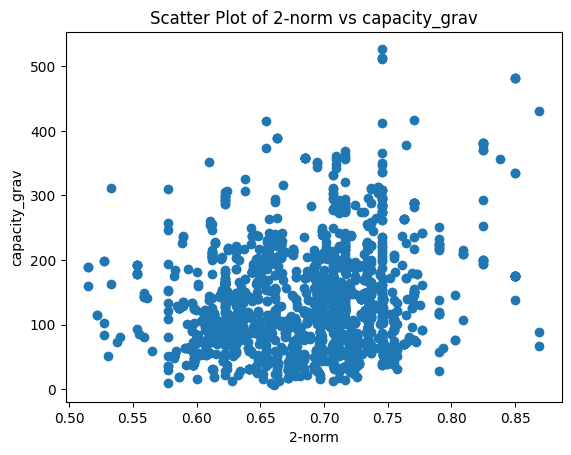

In [ ]:
# 化合物の特性ベクトルの各要素の値の2乗の合計の平方根と電荷量の重量比の散布図
corr_plot("2-norm", target)

相関係数：0.2534016305449492
p値0.000
母相関係数は0ではないため、相関がある


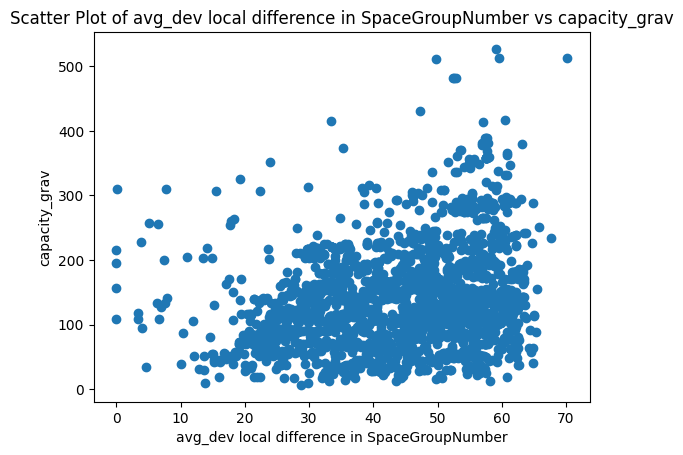

In [ ]:
#空間群番号と電荷量の重量比の散布図
corr_plot("avg_dev local difference in SpaceGroupNumber", target)

相関係数：-0.16441133217659268
p値0.000
母相関係数は0ではないため、相関がある


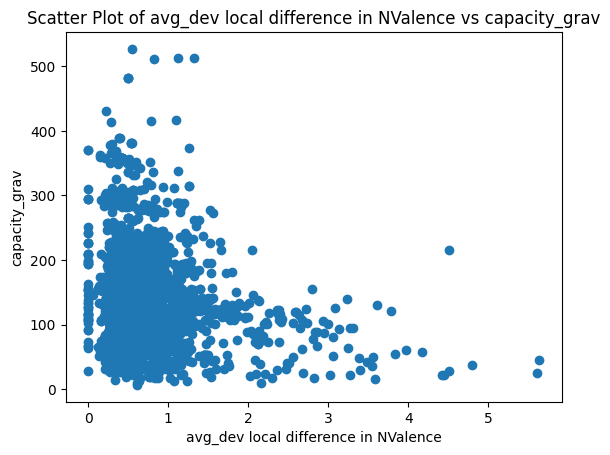

In [ ]:
# 原子またはイオンの価電子数の平均偏差と電荷量の重量比の散布図
corr_plot("avg_dev local difference in NValence", target)

相関係数：0.26824513068303785
p値0.000
母相関係数は0ではないため、相関がある


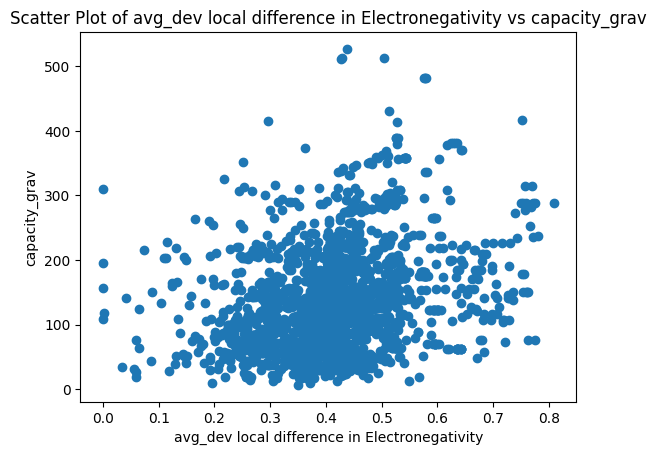

In [ ]:
# 電気陰性度と電荷量の重量比の散布図
corr_plot("avg_dev local difference in Electronegativity", target)

## 下記の変数には相関が見られた

- 放電時のLiイオンの割合
- ステップ数
- 原子またはイオンの価電子数の最大値
- p軌道に存在する価電子
- 結晶構造の各原子の最も近い原子を基準とした平均秩序パラメータ
- 化合物の特性ベクトルの各要素の値の2乗の合計の平方根
- 空間群番号
- 原子またはイオンの価電子数の平均偏差
- 電気陰性度